# Finding Dielectric Constant and Loss from Resonance Fitting

In this example, the Q-factors are fitted from S-parameters data measured to characterize PCB laminate materials. The data correspond to a 36, 72 and 144 mm long stripline resonator respectively. We will then deduce the Dielectric permittivity and loss constants.

## Fitting Q-factors

In [1]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
rf.stylely()

In [2]:
# Loading the data.
# Setting the frequency unit is optional, just a convenience for displaying results
Reson36 = rf.Network('data/resonator_36mm.s2p', f_unit='GHz')
Reson72 = rf.Network('data/resonator_72mm.s2p', f_unit='GHz')
Reson144 = rf.Network('data/resonator_144mm.s2p', f_unit='GHz')

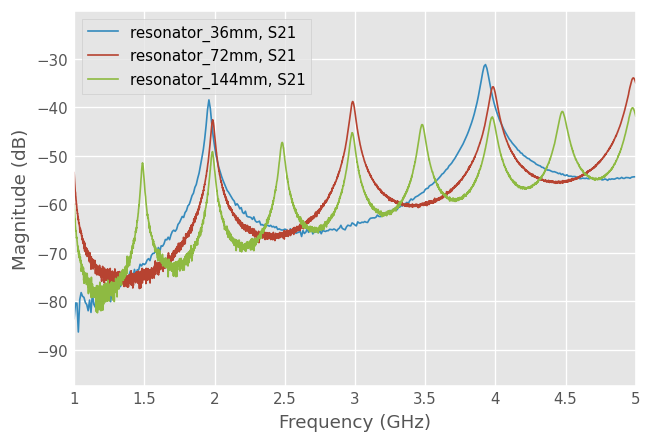

In [3]:
Reson36.plot_s_db(m=1, n=0)
Reson72.plot_s_db(m=1, n=0)
Reson144.plot_s_db(m=1, n=0)

To find the Q-factors of these resonators, we create a `Qfactor` object from the transmission S-parameters we want to fit.

Note that is there are many resonances close to each other, it is recommanded to pass the frequency sub-Networks for the range of frequency of interest, to help the convergence of the fitting algorithm. Here, we are interested in the resonances occuring around 2 and 4 GHz, hence:

In [4]:
# Around 2 GHz
QF_36_2GHz = rf.Qfactor(Reson36['1.75-2.25GHz'].s21, res_type='transmission')
QF_72_2GHz = rf.Qfactor(Reson72['1.75-2.25GHz'].s21, res_type='transmission')
QF_144_2GHz = rf.Qfactor(Reson144['1.75-2.25GHz'].s21, res_type='transmission')
# Around 4 GHz
QF_36_4GHz = rf.Qfactor(Reson36['3.75-4.25GHz'].s21, res_type='transmission')
QF_72_4GHz = rf.Qfactor(Reson72['3.75-4.25GHz'].s21, res_type='transmission')
QF_144_4GHz = rf.Qfactor(Reson144['3.75-4.25GHz'].s21, res_type='transmission')

print(QF_36_2GHz)
print(QF_72_2GHz)
print(QF_144_2GHz)

Q-factor of Network resonator_36mm. (not fitted)
Q-factor of Network resonator_72mm. (not fitted)
Q-factor of Network resonator_144mm. (not fitted)


Then we fit the Q-factors:

In [5]:
res_36_2GHz = QF_36_2GHz.fit()
res_72_2GHz = QF_72_2GHz.fit()
res_144_2GHz = QF_144_2GHz.fit()

print(QF_36_2GHz)
print(QF_72_2GHz)
print(QF_144_2GHz)

Q-factor of Network resonator_36mm. (fitted: f_L=1.960GHz, Q_L=72.475)
Q-factor of Network resonator_72mm. (fitted: f_L=1.987GHz, Q_L=74.283)
Q-factor of Network resonator_144mm. (fitted: f_L=1.985GHz, Q_L=73.545)


In [6]:
res_36_4GHz = QF_36_4GHz.fit()
res_72_4GHz = QF_72_4GHz.fit()
res_144_4GHz = QF_144_4GHz.fit()

print(QF_36_4GHz)
print(QF_72_4GHz)
print(QF_144_4GHz)

Q-factor of Network resonator_36mm. (fitted: f_L=3.927GHz, Q_L=74.018)
Q-factor of Network resonator_72mm. (fitted: f_L=3.983GHz, Q_L=75.717)
Q-factor of Network resonator_144mm. (fitted: f_L=3.977GHz, Q_L=74.711)


We can create the Networks corresponding to the fitted results to benchmark the model against the measurements:

In [7]:
new_freq = rf.Frequency(1, 5, unit='GHz', npoints=1001)
fitted_ntwk_36_2GHz = QF_36_2GHz.fitted_network(res_36_2GHz, frequency=new_freq)
fitted_ntwk_72_2GHz = QF_72_2GHz.fitted_network(res_72_2GHz, frequency=new_freq)
fitted_ntwk_144_2GHz = QF_144_2GHz.fitted_network(res_144_2GHz, frequency=new_freq)

fitted_ntwk_36_4GHz = QF_36_4GHz.fitted_network(res_36_4GHz, frequency=new_freq)
fitted_ntwk_72_4GHz = QF_72_4GHz.fitted_network(res_72_4GHz, frequency=new_freq)
fitted_ntwk_144_4GHz = QF_144_4GHz.fitted_network(res_144_4GHz, frequency=new_freq)

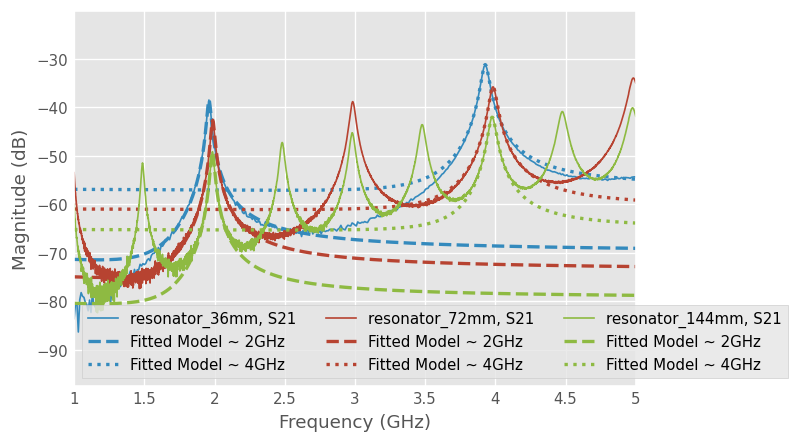

In [8]:
Reson36.plot_s_db(m=1, n=0, color='C0')
fitted_ntwk_36_2GHz.plot_s_db(label='Fitted Model ~ 2GHz', lw=2, color='C0', ls='--')
fitted_ntwk_36_4GHz.plot_s_db(label='Fitted Model ~ 4GHz', lw=2, color='C0', ls=':')
Reson72.plot_s_db(m=1, n=0, color='C1')
fitted_ntwk_72_2GHz.plot_s_db(label='Fitted Model ~ 2GHz', lw=2, color='C1', ls='--')
fitted_ntwk_72_4GHz.plot_s_db(label='Fitted Model ~ 4GHz', lw=2, color='C1', ls=':')
Reson144.plot_s_db(m=1, n=0, color='C2')
fitted_ntwk_144_2GHz.plot_s_db(label='Fitted Model ~ 2GHz', lw=2, color='C2', ls='--')
fitted_ntwk_144_4GHz.plot_s_db(label='Fitted Model ~ 4GHz', lw=2, color='C2', ls=':')
plt.gca().legend(ncol=3)

Another way to represent the results is to use polar planes:

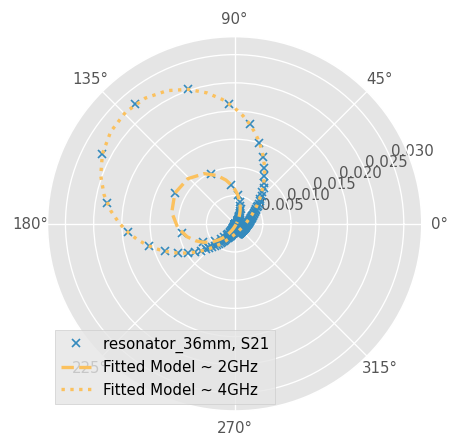

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
Reson36.plot_s_polar(m=1, n=0, ax=ax, ls='', marker='x', ms=5)
fitted_ntwk_36_2GHz.plot_s_polar(ax=ax, label="Fitted Model ~ 2GHz", lw=2, ls='--', color='C3')
fitted_ntwk_36_4GHz.plot_s_polar(ax=ax, label="Fitted Model ~ 4GHz", lw=2, ls=':', color='C3')

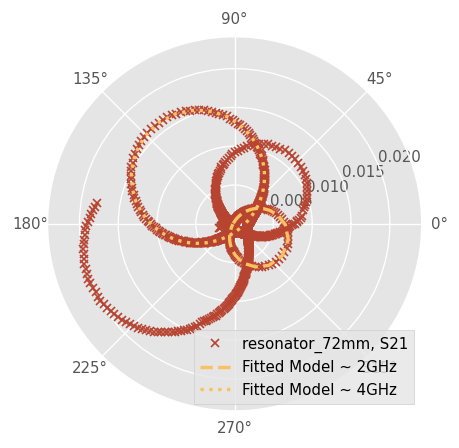

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
Reson72.plot_s_polar(m=1, n=0, ax=ax, ls='', marker='x', ms=5, color='C1')
fitted_ntwk_72_2GHz.plot_s_polar(ax=ax, label="Fitted Model ~ 2GHz", lw=2, ls='--', color='C3')
fitted_ntwk_72_4GHz.plot_s_polar(ax=ax, label="Fitted Model ~ 4GHz", lw=2, ls=':', color='C3')

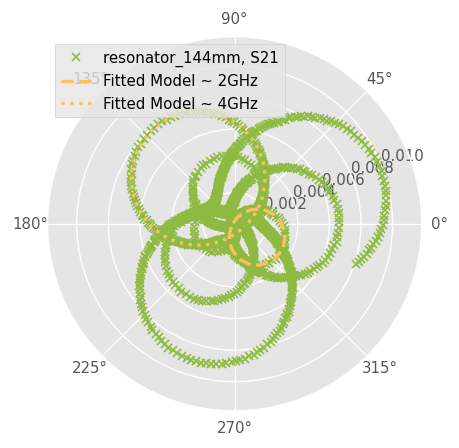

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
Reson144.plot_s_polar(m=1, n=0, ax=ax, ls='', marker='x', ms=5, color='C2')
fitted_ntwk_144_2GHz.plot_s_polar(ax=ax, label="Fitted Model ~ 2GHz", lw=2, ls='--', color='C3')
fitted_ntwk_144_4GHz.plot_s_polar(ax=ax, label="Fitted Model ~ 4GHz", lw=2, ls=':', color='C3')

## Deducing Permittivity and Loss
Equations for calculation Dk (aka $\epsilon_r$) and Df (aka $\tan \delta$) from measured data for a pair of stripline resonators are given in [1]:

$$\epsilon_r = \frac{c^2 \left( \frac{n_2}{F_2} - \frac{n_1}{F_1} \right)^2}{4 (L_2 - L_1)^2}$$

where:
- $L_i$ is the length of resonator $i$,
- $n_i$ is the number of half wavelengths at resonance in resonator $i$,
- $F_i$ is the resonance frequency of resonator $i$ and
- $c$ is the speed of light in vacuum.

and 
$$\tan \delta = \frac{1}{Q} - \frac{1}{Q_c}$$
where:
- $Q_c$ is the Q-value associated with the copper loss: 250 at 2 GHz and 360 at 4 GHz according to IPC.

Hence, for the permittivity:

In [12]:
def Dk(f1, f2, l1, l2, n1, n2):
    "Calculates Dk from resonator data"
    return rf.c**2 * (n2/f2 - n1/f1)**2 / 4 / (l2 - l1)**2

In [13]:
Dk(QF_72_2GHz.f_L, QF_144_2GHz.f_L, 72e-3, 144e-3, 2, 4)

array([4.41131741])

And the loss tangent:

In [14]:
Qc = 250  # from IPC
print(1/QF_36_2GHz.Q_L - 1/Qc)

[0.00979785]


In [15]:
Qc = 250  # from IPC
print(1/QF_144_2GHz.Q_L - 1/Qc)

[0.00959709]


In [16]:
Qc = 360  # from IPC
print(1/QF_36_4GHz.Q_L - 1/Qc)

[0.01073251]


In [17]:
Qc = 360  # from IPC
print(1/QF_144_4GHz.Q_L - 1/Qc)

[0.01060713]


## References
- [1] IPC-TM-650 TEST METHODS MANUAL, https://www.ipc.org/sites/default/files/test_methods_docs/2-5_2-5-5-5.pdf